# Profilage client par RFM et clustering

Nous utilisons ici une approche RFM (Récence, Fréquence, Montant) pour caractériser les clients, suivie d’un clustering.

## Étapes :
- Calcul des scores RFM
- Normalisation des données
- Clustering K-Means (ou DBSCAN)
- Réduction de dimension (PCA ou t-SNE)

Objectif : segmenter les clients en groupes homogènes selon leur comportement.


In [1]:
# Ouverture du fichier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "../data/agg_data.csv"
DATA = pd.read_csv(FILE)
print(DATA.shape)
DATA.head()

(4338, 6)


,CustomerID,Total_Purchases,Purchase_Frequency,Unique_Products,Average_Basket,Active_Days
0,12346,1,1,1,77183.600000,1
1,12347,7,182,103,6498.979011,7
2,12348,4,31,22,13495.487419,4
3,12349,1,73,73,5230.384932,1
4,12350,1,17,17,756.711765,1


/home/guillaume/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


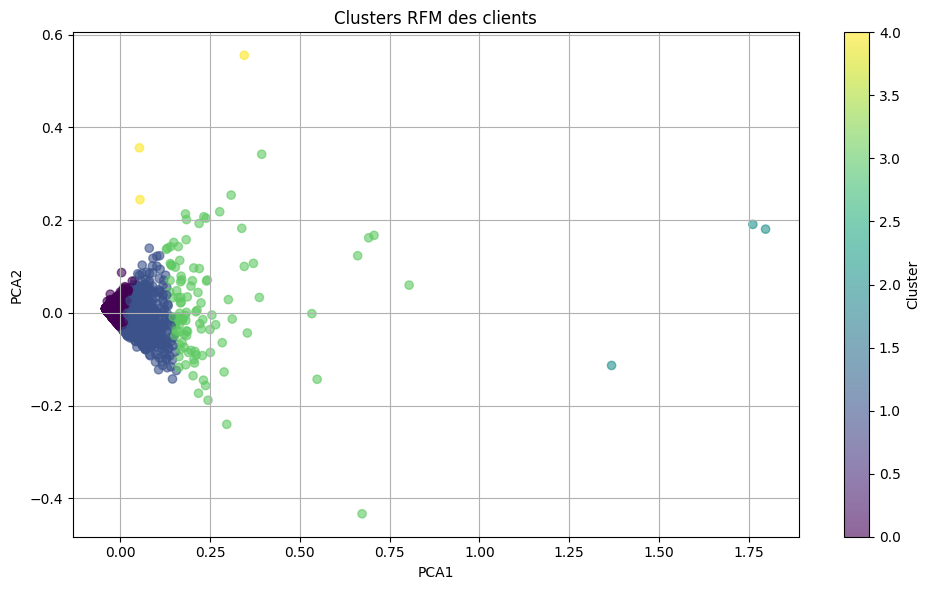

In [3]:
"""
- Calcul des scores RFM
- Normalisation des données
- Clustering K-Means (ou DBSCAN)
- Réduction de dimension (PCA ou t-SNE)

Colonnes : 
    CustomerID
    Total_Purchases
    Purchase_Frequency
    Unique_Products
    Average_Basket
    Active_Days
"""
# Calcul des scores RFM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_data = DATA[['Total_Purchases', 'Purchase_Frequency', 'Unique_Products', 'Average_Basket', 'Active_Days']]
rfm_data_scaled = scaler.fit_transform(rfm_data)
rfm_data_scaled = pd.DataFrame(rfm_data_scaled, columns=rfm_data.columns)
# Clustering K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data_scaled)
# Réduction de dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfm_data_pca = pca.fit_transform(rfm_data_scaled)
rfm_data_pca = pd.DataFrame(rfm_data_pca, columns=['PCA1', 'PCA2'])
rfm_data = pd.concat([rfm_data, rfm_data_pca], axis=1)
# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(rfm_data['PCA1'], rfm_data['PCA2'], c=rfm_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Clusters RFM des clients")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
# sauvegarde des données
rfm_data.to_csv("../data/rfm_data.csv", index=False)
rfm_data.head()

,Total_Purchases,Purchase_Frequency,Unique_Products,Average_Basket,Active_Days,Cluster,PCA1,PCA2
0,1,1,1,77183.600000,1,0,-0.036579,0.024668
1,7,182,103,6498.979011,7,1,0.031528,-0.004743
2,4,31,22,13495.487419,4,0,-0.017361,0.016516
3,1,73,73,5230.384932,1,0,-0.011955,-0.017949
4,1,17,17,756.711765,1,0,-0.034325,0.002772
